# Análisis de la empresa Showz

**Propósito del proyecto:**

El propósito de este proyecto es desarrollar un sistema integral de análisis de datos que permita evaluar el rendimiento y la efectividad de la plataforma en términos de visitas, ventas y estrategias de marketing. A través de informes detallados, se busca medir la frecuencia y duración de las visitas, analizar la recurrencia de los usuarios y comprender los patrones de sesión en diferentes períodos de tiempo. En el ámbito de ventas, el proyecto se enfoca en identificar el momento en que los usuarios realizan su primera compra, evaluar la conversión de cohortes y medir la actividad comercial, desde el número de pedidos hasta el tamaño promedio de compra y el valor de vida del cliente (LTV). Además, se realiza un análisis del gasto en marketing, calculando el costo de adquisición por fuente y la rentabilidad de las inversiones (ROMI). Para visualizar estos datos de manera efectiva, se generarán gráficos comparativos que mostrarán las variaciones en métricas clave según dispositivo y fuente de adquisición, así como su evolución en el tiempo. Todo esto con el objetivo de optimizar estrategias, mejorar la retención de usuarios y maximizar el retorno de inversión.

## Inicialización

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from matplotlib import pyplot as plt
from scipy import stats as st

## Cargar datos

In [ ]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')

df_visits.info()
df_visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [ ]:
# Cambiar tipo de datos
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'])
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])

In [ ]:
# Reemplazar columnas a minusculas y snake_case
df_visits.columns = [col.lower().replace(" ", "_") for col in df_visits.columns]

In [ ]:
df_orders = pd.read_csv('/datasets/orders_log_us.csv')

df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [ ]:
# Cambiar tipo de datos
df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'])

In [ ]:
# Reemplazar columnas a minusculas y snake_case
df_orders.columns = [col.lower().replace(" ", "_") for col in df_orders.columns]

In [ ]:
df_costs = pd.read_csv('/datasets/costs_us.csv')

df_costs.info()
df_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [ ]:
# Cambiar tipo de datos
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

## 1. Visitas:

### ¿Cuántas personas usan el servicio cada día, semana y mes?

In [ ]:
daily_users = df_visits.groupby(df_visits['start_ts'].dt.date)['uid'].nunique()
weekly_users = df_visits.groupby(df_visits['start_ts'].dt.to_period('W'))['uid'].nunique()
monthly_users = df_visits.groupby(df_visits['start_ts'].dt.to_period('M'))['uid'].nunique()

print("Usuarios únicos por día:\n", daily_users.head(10))
print("\nUsuarios únicos por semana:\n", weekly_users.head(10))
print("\nUsuarios únicos por mes:\n", monthly_users.head(10))

Usuarios únicos por día:
 start_ts
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
2017-06-06    797
2017-06-07    699
2017-06-08    868
2017-06-09    695
2017-06-10    350
Name: uid, dtype: int64

Usuarios únicos por semana:
 start_ts
2017-05-29/2017-06-04    2021
2017-06-05/2017-06-11    4129
2017-06-12/2017-06-18    2812
2017-06-19/2017-06-25    2878
2017-06-26/2017-07-02    3064
2017-07-03/2017-07-09    3294
2017-07-10/2017-07-16    4355
2017-07-17/2017-07-23    3841
2017-07-24/2017-07-30    2655
2017-07-31/2017-08-06    2364
Freq: W-SUN, Name: uid, dtype: int64

Usuarios únicos por mes:
 start_ts
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
2017-11    32797
2017-12    31557
2018-01    28716
2018-02    28749
2018-03    27473
Freq: M, Name: uid, dtype: int64


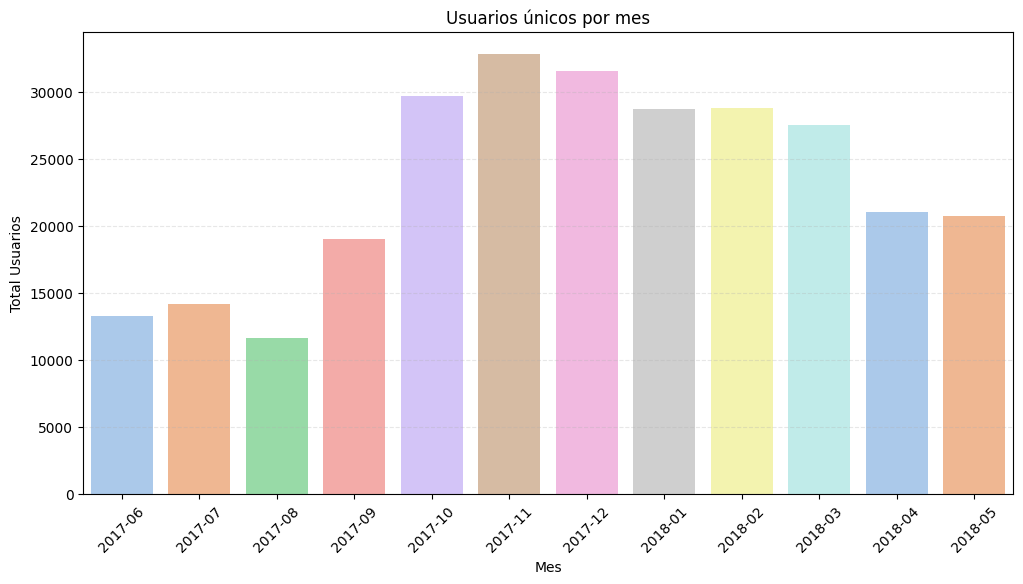

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_users.index, y=monthly_users.values, palette="pastel")
plt.title("Usuarios únicos por mes")
plt.xlabel("Mes")
plt.ylabel("Total Usuarios")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### ¿Cuántas sesiones hay por día?

In [ ]:
daily_sessions = df_visits.groupby(df_visits['start_ts'].dt.date)['uid'].count()

print("Sesiones por día:\n", daily_sessions.head(10))

Sesiones por día:
 start_ts
2017-06-01    664
2017-06-02    658
2017-06-03    477
2017-06-04    510
2017-06-05    893
2017-06-06    875
2017-06-07    788
2017-06-08    939
2017-06-09    755
2017-06-10    375
Name: uid, dtype: int64


### ¿Cuál es la duración de cada sesión?

In [ ]:
df_visits['session_duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.total_seconds() / 60

print(df_visits[['start_ts', 'end_ts', 'session_duration']].head(20))

              start_ts              end_ts  session_duration
0  2017-12-20 17:20:00 2017-12-20 17:38:00              18.0
1  2018-02-19 16:53:00 2018-02-19 17:21:00              28.0
2  2017-07-01 01:54:00 2017-07-01 01:54:00               0.0
3  2018-05-20 10:59:00 2018-05-20 11:23:00              24.0
4  2017-12-27 14:06:00 2017-12-27 14:06:00               0.0
5  2017-09-03 21:35:00 2017-09-03 21:36:00               1.0
6  2018-01-30 11:13:00 2018-01-30 12:09:00              56.0
7  2017-11-05 15:14:00 2017-11-05 15:15:00               1.0
8  2017-07-19 10:41:00 2017-07-19 10:44:00               3.0
9  2017-11-08 13:42:00 2017-11-08 13:43:00               1.0
10 2017-07-14 12:43:00 2017-07-14 12:44:00               1.0
11 2018-01-25 19:37:00 2018-01-25 19:41:00               4.0
12 2018-02-06 15:45:00 2018-02-06 15:50:00               5.0
13 2017-11-27 14:42:00 2017-11-27 14:43:00               1.0
14 2018-04-23 18:00:00 2018-04-23 18:01:00               1.0
15 2018-02-12 19:24:00 2

### ¿Con qué frecuencia los usuarios regresan?

In [ ]:
# Encontrar el primer mes de actividad de cada usuario (cohorte)
df_visits['cohort_month'] = df_visits.groupby('uid')['start_ts'].transform('min').dt.to_period('M')

# Crear la columna de mes de actividad del usuario
df_visits['activity_month'] = df_visits['start_ts'].dt.to_period('M')

# Calcular el ciclo de vida de la cohorte en meses
df_visits['cohort_lifetime'] = (df_visits['activity_month'] - df_visits['cohort_month']).apply(lambda x: x.n)

# Contar usuarios únicos por cohorte y mes de actividad
cohorts = df_visits.groupby(['cohort_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index()

# Obtener el tamaño inicial de cada cohorte
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['cohort_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid': 'cohort_users'})

# Unir tamaños de cohortes con la tabla principal
cohorts = cohorts.merge(initial_users_count, on='cohort_month')

# Calcular la tasa de retención
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users']

# Crear tabla pivote para visualizar la retención por cohortes
retention_pivot = cohorts.pivot_table(
    index='cohort_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum')

print(retention_pivot)

cohort_lifetime   0         1         2         3         4         5   \
cohort_month                                                             
2017-06          1.0  0.078664  0.053775  0.061392  0.068557  0.071423   
2017-07          1.0  0.056088  0.051294  0.056164  0.058219  0.048174   
2017-08          1.0  0.076908  0.062862  0.062764  0.050093  0.044004   
2017-09          1.0  0.085489  0.069205  0.050706  0.039392  0.037835   
2017-10          1.0  0.078608  0.052239  0.038958  0.034261  0.032221   
2017-11          1.0  0.078281  0.044113  0.038682  0.033727  0.023415   
2017-12          1.0  0.055802  0.037993  0.031107  0.020263  0.019036   
2018-01          1.0  0.059715  0.039339  0.024973  0.020244       NaN   
2018-02          1.0  0.057080  0.025454  0.020093       NaN       NaN   
2018-03          1.0  0.041818  0.027053       NaN       NaN       NaN   
2018-04          1.0  0.048380       NaN       NaN       NaN       NaN   
2018-05          1.0       NaN       N

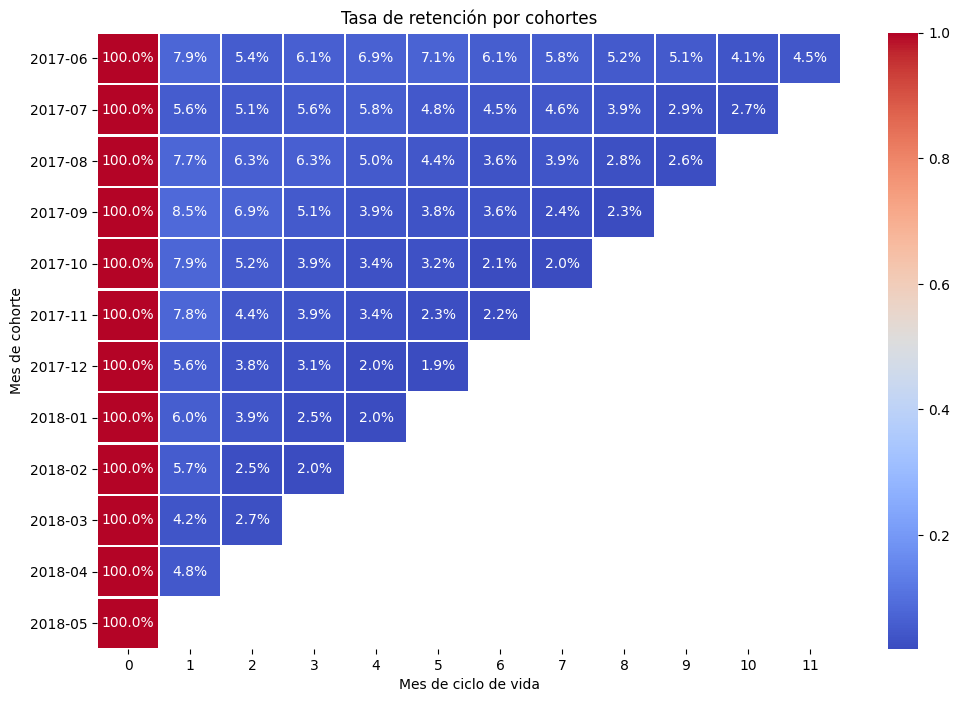

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention_pivot, annot=True, fmt=".1%", linewidths=1, cmap="coolwarm")
plt.title("Tasa de retención por cohortes")
plt.xlabel("Mes de ciclo de vida")
plt.ylabel("Mes de cohorte")
plt.show()

In [ ]:
# Ordenar por usuario y fecha de visita
df_visits = df_visits.sort_values(by=['uid', 'start_ts'])

# Calcular tiempo entre visitas
df_visits['days_since_last_visit'] = df_visits.groupby('uid')['start_ts'].diff().dt.days

# Calcular promedio de visitas
average_return_time = df_visits['days_since_last_visit'].mean()

print(f"Tiempo promedio entre visitas: {average_return_time:.2f} días")

Tiempo promedio entre visitas: 27.68 días


## 2. Ventas:

### ¿Cuándo empieza la gente a comprar?

In [ ]:
# Encontrar fecha de primera visita para cada usuario
first_visit = df_visits.groupby('uid')['start_ts'].min().reset_index()
first_visit = first_visit.rename(columns={'start_ts': 'registration_date'})

# Vincular con pedidos
df_orders = df_orders.merge(first_visit, on='uid', how='left')

# Calcular días entre registro y primera compra
df_orders['conversion_days'] = (df_orders['buy_ts'] - df_orders['registration_date']).dt.days

# Categorizar conversión
df_orders['conversion_category'] = df_orders['conversion_days'].apply(lambda x: f'Conversion {x}d' if x >= 0 else 'No conversion')

# Contar conversiones
conversion_counts = df_orders['conversion_category'].value_counts().sort_index()

print("Distribución de conversiones:\n", conversion_counts)

Distribución de conversiones:
 Conversion 0d      28103
Conversion 100d       66
Conversion 101d       67
Conversion 102d       50
Conversion 103d       56
                   ...  
Conversion 96d        65
Conversion 97d        72
Conversion 98d        77
Conversion 99d        67
Conversion 9d        257
Name: conversion_category, Length: 365, dtype: int64


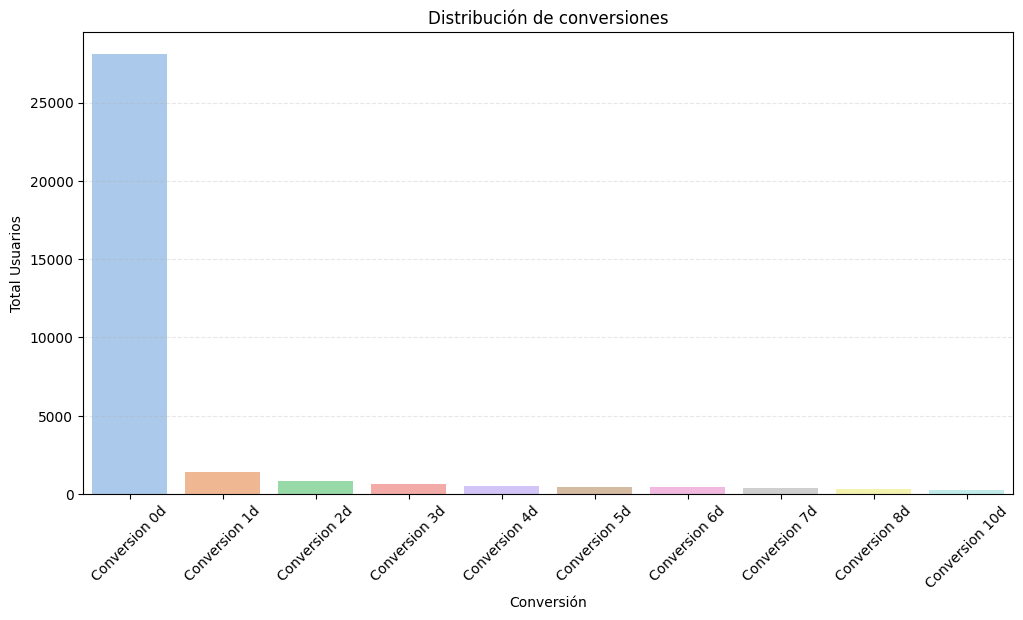

In [ ]:
top10_conversion_counts = conversion_counts.sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_conversion_counts.index, y=top10_conversion_counts.values, palette="pastel")
plt.title("Distribución de conversiones")
plt.xlabel("Conversión")
plt.ylabel("Total Usuarios")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
# Contar visitantes únicos
total_visitors = df_visits['uid'].nunique()

# Contar compradores únicos
total_buyers = df_orders['uid'].nunique()

# Calcular tasa de conversión
conversion_rate = (total_buyers / total_visitors) * 100

print(f"Tasa de conversión: {conversion_rate:.2f}%")

Tasa de conversión: 16.01%


### ¿Cuántos pedidos hacen durante un período de tiempo dado?

In [ ]:
# Definir el período de análisis
start_date = '2017-01-01'
end_date = '2018-12-31'

# Filtrar pedidos dentro del período
filtered_orders = df_orders[(df_orders['buy_ts'] >= start_date) & (df_orders['buy_ts'] <= end_date)]

# Contar pedidos por mes
monthly_orders = filtered_orders.groupby(filtered_orders['buy_ts'].dt.to_period('M'))['uid'].count()

print("Pedidos por mes en el período seleccionado:\n", monthly_orders)
print(f"\nTotal de pedidos en el período: {filtered_orders.shape[0]}")

Pedidos por mes en el período seleccionado:
 buy_ts
2017-06    2354
2017-07    2363
2017-08    1807
2017-09    3387
2017-10    5679
2017-11    5659
2017-12    6218
2018-01    4721
2018-02    5281
2018-03    5326
2018-04    3273
2018-05    4346
2018-06       1
Freq: M, Name: uid, dtype: int64

Total de pedidos en el período: 50415


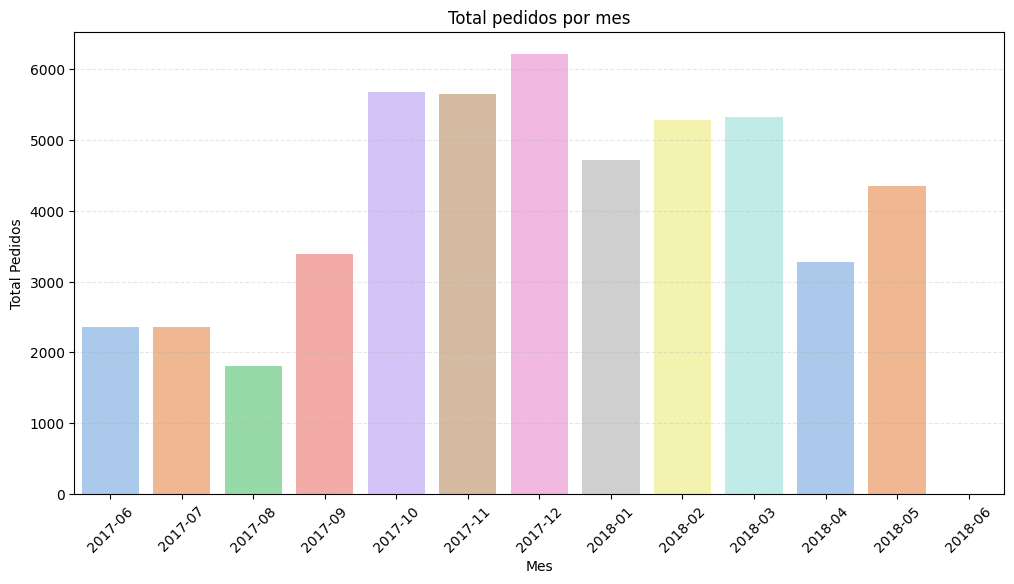

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_orders.index, y=monthly_orders.values, palette="pastel")
plt.title("Total pedidos por mes")
plt.xlabel("Mes")
plt.ylabel("Total Pedidos")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### ¿Cuál es el tamaño promedio de compra?

In [ ]:
average_order_size = df_orders['revenue'].mean()

print(f"El tamaño promedio de compra es: {average_order_size:.2f}")

El tamaño promedio de compra es: 5.00


### ¿Cuánto dinero traen?

In [ ]:
user_lifetime_value = df_orders.groupby('uid')['revenue'].sum()
print(user_lifetime_value.sort_values(ascending=False).head(15))

uid
5539673724080479777     11810.18
11149926373378902217    10519.46
17999372575896145244     1979.33
6731421022966725351      1450.68
3644482766749211722      1444.29
9737640335185488211      1310.71
8539015707073391293      1240.76
13888745432979765063     1191.02
1668300487562478408      1163.63
6268225112727843212      1158.32
11920452646463905188     1123.22
6853820180456171909      1034.03
3263486045884611639      1012.44
14965030714373758003      754.08
5139615590553126732       745.57
Name: revenue, dtype: float64


In [ ]:
average_ltv = user_lifetime_value.mean()

print(f"El valor de vida promedio del cliente (LTV) es: {average_ltv:.2f}")

El valor de vida promedio del cliente (LTV) es: 6.90


## 3. Marketing:

### ¿Cuánto dinero se gastó?

In [ ]:
total_spent = df_costs['costs'].sum()
print(f"Gasto total: {total_spent:.2f}")

Gasto total: 329131.62


In [ ]:
cost_by_source = df_costs.groupby('source_id')['costs'].sum().sort_values(ascending=False)
print("\nGasto por fuente de adquisición:\n", cost_by_source)


Gasto por fuente de adquisición:
 source_id
3     141321.63
4      61073.60
5      51757.10
2      42806.04
1      20833.27
10      5822.49
9       5517.49
Name: costs, dtype: float64


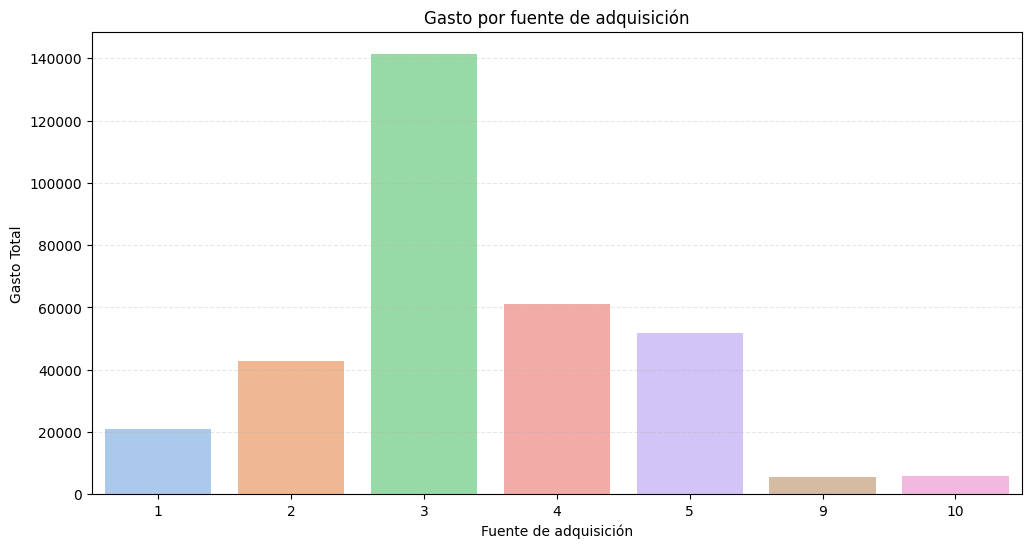

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cost_by_source.index, y=cost_by_source.values, palette="pastel")
plt.title("Gasto por fuente de adquisición")
plt.xlabel("Fuente de adquisición")
plt.ylabel("Gasto Total")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [ ]:
cost_over_time = df_costs.groupby(df_costs['dt'].dt.to_period('M'))['costs'].sum()
print("\nGasto a lo largo del tiempo:\n", cost_over_time)


Gasto a lo largo del tiempo:
 dt
2017-06    18015.00
2017-07    18240.59
2017-08    14790.54
2017-09    24368.91
2017-10    36322.88
2017-11    37907.88
2017-12    38315.35
2018-01    33518.52
2018-02    32723.03
2018-03    30415.27
2018-04    22289.38
2018-05    22224.27
Freq: M, Name: costs, dtype: float64


### ¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [ ]:
customers_by_source = df_visits.groupby('source_id')['uid'].nunique()

In [ ]:
cac_by_source = (cost_by_source / customers_by_source).dropna()

print("Costo de adquisición de clientes por fuente:\n", cac_by_source)

Costo de adquisición de clientes por fuente:
 source_id
1     1.096546
2     1.631017
3     1.890439
4     0.731201
5     0.908434
9     0.595584
10    0.721766
dtype: float64


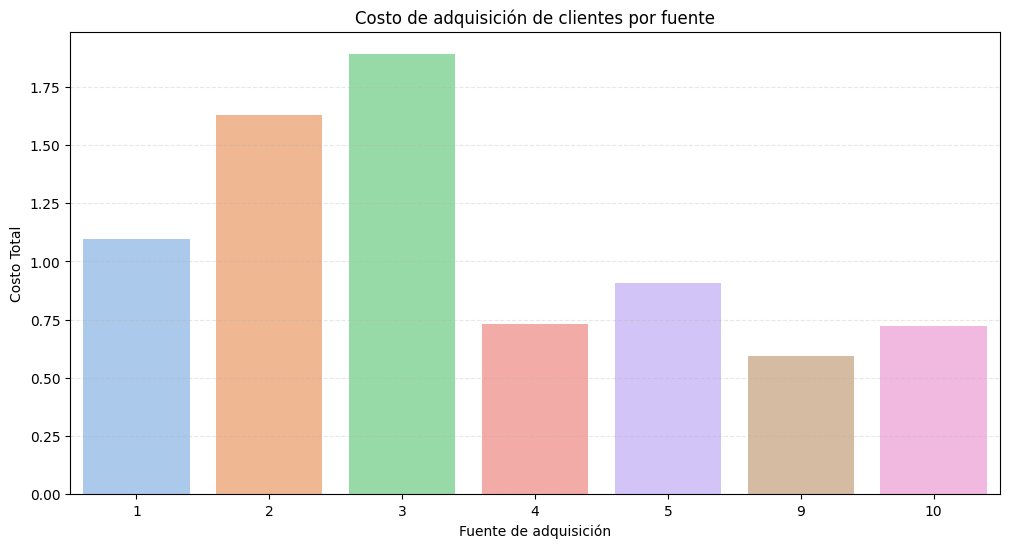

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=cac_by_source.index, y=cac_by_source.values, palette="pastel")
plt.title("Costo de adquisición de clientes por fuente")
plt.xlabel("Fuente de adquisición")
plt.ylabel("Costo Total")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

### ¿Cuán rentables eran las inversiones?

In [ ]:
df_orders = df_orders.merge(df_visits[['uid', 'source_id']], on='uid', how='left')

In [ ]:
#Calcular ingresos por fuente de adquisición
revenue_by_source = df_orders.groupby('source_id')['revenue'].sum()

#Calcular ROMI
romi_by_source = ((revenue_by_source - cost_by_source) / cost_by_source).dropna()
print("Retorno sobre la inversión en marketing (ROMI) por fuente:\n", romi_by_source)

Retorno sobre la inversión en marketing (ROMI) por fuente:
 source_id
1     109.313944
2      60.631237
3       1.099381
4       7.132649
5      21.827344
9       5.586736
10      1.510821
dtype: float64


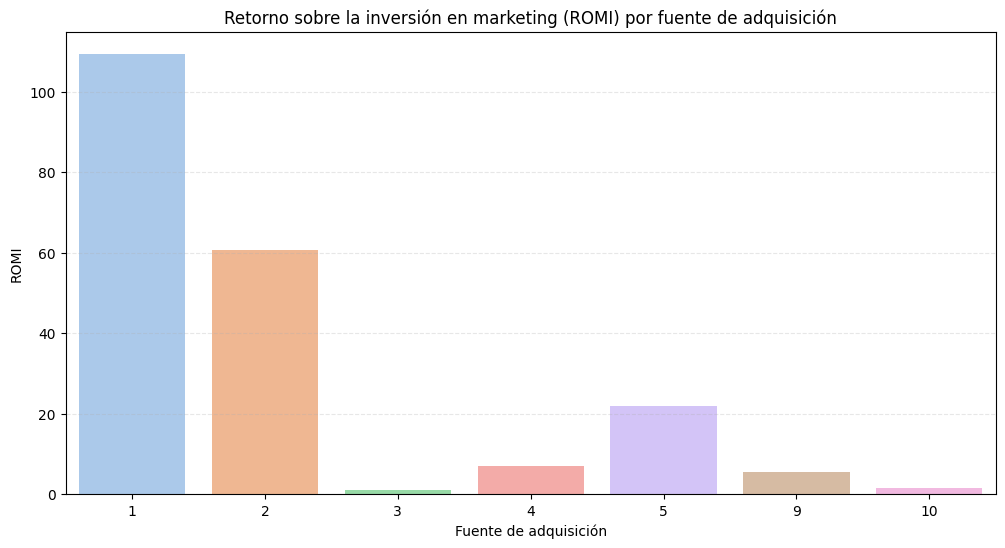

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=romi_by_source.index, y=romi_by_source.values, palette="pastel")
plt.title("Retorno sobre la inversión en marketing (ROMI) por fuente de adquisición")
plt.xlabel("Fuente de adquisición")
plt.ylabel("ROMI")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

## Conclusión

Después de analizar las métricas clave como Retorno sobre la Inversión en Marketing (ROMI), Costo de Adquisición de Clientes (CAC), Tasa de Retención y Valor de Vida del Cliente (LTV), se identificaron patrones fundamentales sobre adquisición, rentabilidad y fidelización de clientes en las diferentes fuentes de anuncios.

La decisión sobre dónde invertir en marketing debe centrarse en fuentes con mejor desempeño en estas métricas, ya que no se trata solo de gastar más, sino de hacerlo de manera estratégica.

Basándonos en el análisis de datos, la fuente 1 es la mejor opción para continuar la inversión, ya que:
- Tiene un ROMI positivo, lo que significa que por cada peso invertido en adquisición de clientes, la empresa obtiene un retorno financiero favorable.
- Su CAC es menor que el LTV, lo que indica que la inversión genera ganancias sostenibles a largo plazo.
- Su tasa de conversión es alta, lo que demuestra que los usuarios de esta fuente pasan rápidamente del registro a la compra.
- Su retención de clientes es sólida, lo que sugiere que los usuarios adquiridos continúan generando ingresos con el tiempo.

Por otro lado, la fuente 3 muestra desafíos significativos:
- Tiene gastos y CAC elevados, lo que significa que adquirir clientes por este canal es costoso en comparación con otras fuentes.
- Su rentabilidad es baja, lo que indica que los ingresos generados no justifican la inversión realizada en adquisición.
- Su tasa de retención es baja, por lo que los clientes obtenidos no se mantienen activos en el tiempo, reduciendo su impacto en el LTV.

Para maximizar el retorno de inversión, el enfoque debe equilibrarse entre adquisición y retención:
- Incrementar el presupuesto en fuentes con ROMI alto, ya que estas tienen una tasa de conversión favorable y generan clientes con alto LTV.
- Reducir inversión en fuentes con CAC elevado y baja rentabilidad, para evitar desperdiciar presupuesto en estrategias poco efectivas.
- Implementar estrategias de retención, como programas de fidelización o campañas de engagement, para aumentar el LTV de los clientes ya adquiridos.
- Monitorear las métricas de conversión periódicamente, asegurando que el CAC se mantenga eficiente y que los clientes adquiridos continúen generando ingresos.
